## First condition

Импортируем библиотеки

In [14]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from tqdm import tqdm

Запишем параметры задачи

In [15]:
average_demand = 2500
number_of_cookies = 12
std_demand = 500
package_cost = 50
cost_price = 30
cutprice = 15

Сначала сгенерируем спрос с нормальным распределением, потом прологарифмируем и оценим через stats.norm.fit параметры для логнормального распределения с нашим средним и стандартным отклонением
 

In [16]:
demand = np.random.normal(average_demand, std_demand, 10000)  
logdemand = np.log(np.abs(demand)) 
estimated_mu, estimated_sigma = stats.norm.fit(logdemand)

In [17]:
#проверим какие у нас mu и sigma получились

In [18]:
estimated_mu

7.806432315005614

In [19]:
estimated_sigma

0.21339506076353867

Генерируем спрос с параметрами для логнормального распределения, строим гистограмму

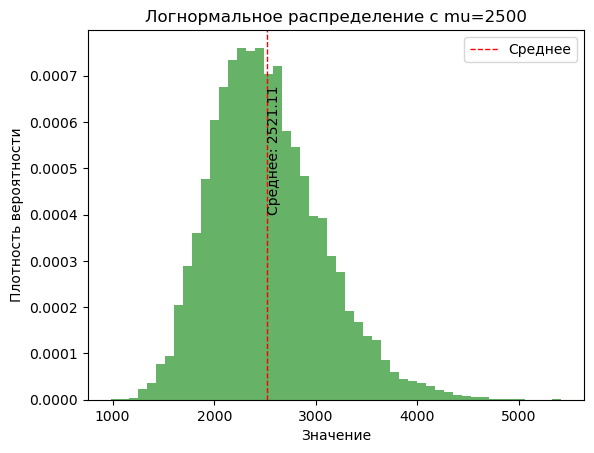

In [20]:
demand = np.random.lognormal(estimated_mu, estimated_sigma, 10000)
plt.hist(demand, bins=50, density=True, alpha=0.6, color='g')
mean_demand = np.mean(demand)

# Отображение среднего значения на графике
plt.axvline(mean_demand, color='r', linestyle='dashed', linewidth=1, label='Среднее')
plt.text(mean_demand, 0.0004, f'Среднее: {mean_demand:.2f}', rotation=90, va='bottom')

# Добавление заголовка и подписей осей
plt.title('Логнормальное распределение с mu=2500')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')

# Отображение графика
plt.legend()
plt.show()

Пишем функцию, которая берет на вход величину предложения и сгенерированный спрос, а потом прогоняет различные сценарии: предложение меньше/равно/больше спроса,  записывает прибыль, потери. На выходе получаем словарик из соответствующих значений

In [21]:
def calculating_profit(Qs: int, demand: list) -> dict:
    results = {'profit': [], 'deficit_costs': [], 'proficit_costs': []}
    
    for Qd in demand:
        if Qs < Qd:
            profit = package_cost * Qs - cost_price * Qs
            deficit_costs = (package_cost - cost_price) * (Qd - Qs)
            proficit_costs = 0
        elif Qs == Qd:
            profit = package_cost * Qs - cost_price * Qs
            deficit_costs = 0
            proficit_costs = 0
        else:
            profit = package_cost * Qd + cutprice * (Qs - Qd) - cost_price * Qs
            proficit_costs = (cost_price - cutprice) * (Qs - Qd)
            deficit_costs = 0

        results['profit'].append(profit)
        results['deficit_costs'].append(deficit_costs)
        results['proficit_costs'].append(proficit_costs)

    return results

Здесь ищем оптимальное значение величины предложения

In [22]:
def search_optimum(possible_Qs:int, demand:int) -> int:
    max_profit = 0
    for Qs in tqdm(range(0, possible_Qs, 1)):
        Qs_dict = calculating_profit(Qs, demand)
        if np.mean(Qs_dict['profit']) > max_profit:
            Qs_optimum = Qs
            max_profit = np.mean(Qs_dict['profit'])       
    return Qs_optimum      
        

In [23]:
Qs = search_optimum(5000, demand)

100%|██████████| 5000/5000 [01:21<00:00, 61.30it/s]


In [24]:
Qs   #оптимальное количество

2560

In [25]:
optimum_dict = calculating_profit(Qs, demand)

Средняя и медианная величина прибыли

In [26]:
# Вывод среднего значения прибыли
mean_profit = round(np.mean(optimum_dict['profit']),2)
print("Средняя прибыль:", mean_profit)

# Вывод медианы прибыли
median_profit = round(np.median(optimum_dict['profit']),2)
print("Медиана прибыли:", median_profit)


Средняя прибыль: 42880.67
Медиана прибыли: 47725.09


Сколько печенья лучше печь ежедневно

In [27]:
optimum_order = Qs*number_of_cookies
print('Оптимальный заказ в штуках:', optimum_order)

Оптимальный заказ в штуках: 30720


Какую сумму в среднем фирма теряет на избытке и на недостатке печенья при оптимальном заказе

In [28]:
average_loss1 = round(np.mean(optimum_dict['proficit_costs']), 2)
print("Средняя потеря при Qs > Qd:", average_loss1)
average_loss2 = round(np.mean(optimum_dict['deficit_costs']), 2)
print("Средняя потеря при Qd > Qs:", average_loss2)


Средняя потеря при Qs > Qd: 3565.43
Средняя потеря при Qd > Qs: 3976.17


In [29]:
results = optimum_dict

Рисуем графики 

NameError: name 'mean' is not defined

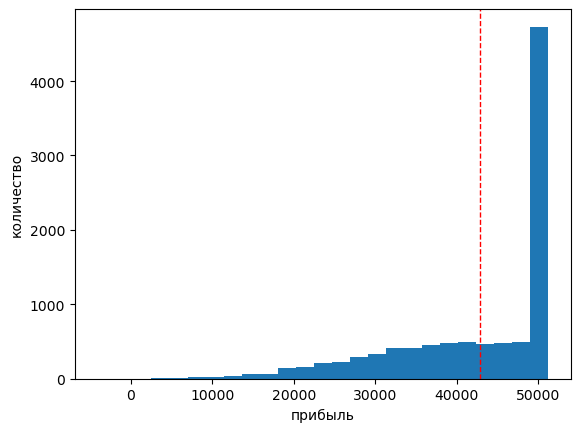

In [30]:
plt.hist(results['profit'], bins = 25)
plt.xlabel("прибыль")
plt.ylabel("количество")
plt.axvline(mean_profit, color='r', linestyle='dashed', linewidth=1, label='Среднее')
plt.text(mean_profit, 2, f'Среднее: {mean:.2f}', rotation=90, va='bottom')
plt.axvline(median_profit, color='g', linestyle='dashed', linewidth=1, label='Медиана')
plt.text(median_profit, 2, f'Медиана: {median_profit:.2f}', rotation=90, va='bottom')
plt.legend()
plt.show()

In [ ]:
plt.hist(results['proficit_costs'], bins = 25)
plt.xlabel("издержки при избытке печенья")
plt.ylabel("количество")
plt.axvline(average_loss1, color='r', linestyle='dashed', linewidth=1, label='Среднее')
plt.text(average_loss1, 2, f'Среднее: {average_loss1:.2f}', rotation=90, va='bottom')
plt.legend()
plt.show()

In [ ]:
plt.hist(results['deficit_costs'], bins = 25)
plt.xlabel("издержки при недостатке печенья")
plt.ylabel("количество")
plt.axvline(average_loss2, color='r', linestyle='dashed', linewidth=1, label='Среднее')
plt.text(average_loss2, 2, f'Среднее: {average_loss2:.2f}', rotation=90, va='bottom')
plt.legend()
plt.show()

## Second condition

Допустим, стандартное отклонение = 1000

In [ ]:
std_demand = 1000

In [ ]:
demand = np.random.normal(average_demand, std_demand, 10000)  
logdemand = np.log(np.abs(demand)) 
estimated_mu, estimated_sigma = stats.norm.fit(logdemand)

In [ ]:
demand = np.random.lognormal(estimated_mu, estimated_sigma, 10000)
Qs2 = search_optimum(5000, demand)
calculating_profit2 = calculating_profit(Qs2, demand)
print('Оптимальное количество:', Qs2) 

In [ ]:
optimum_dict2 = calculating_profit(Qs2, demand)

Ответы на вопросы 1, 2, 3 при стандартном отклонении 1000

In [ ]:
# Вывод среднего значения прибыли
mean_profit = round(np.mean(optimum_dict2['profit']),2)
print("Средняя прибыль:", mean_profit)

# Вывод медианы прибыли
median_profit = round(np.median(optimum_dict2['profit']),2)
print("Медиана прибыли:", median_profit)

# Вывод оптимального заказа
optimum_order = Qs2*number_of_cookies
print('Оптимальный заказ в штуках:', optimum_order)

#Вывод потер при избытке и при недостатке
average_loss1 = round(np.mean(optimum_dict2['proficit_costs']), 2)
print("Средняя потеря при Qs > Qd:", average_loss1)
average_loss2 = round(np.mean(optimum_dict2['deficit_costs']), 2)
print("Средняя потеря при Qd > Qs:", average_loss2)

## Вывод

Неопределенность в отклонении спроса приносит меньшую прибыль производителю, в связи с чем он будет продавать меньше, так как издержки потерь больше

Здесь мы не брали в учет тот факт, как продается продукция на следующий день 
(что сначала спрос удовлетворяется товаром с уценкой, а потом обычным)
